'''
The insurance dataset typically contains information about individuals or groups of people and their insurance policies. It often includes various attributes such as age, gender, region, BMI (Body Mass Index), smoking status, number of dependents, insurance charges, etc. The dataset is commonly used for predictive modeling tasks, such as estimating insurance premiums based on individual characteristics.
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To split the data into train and test, evaluate the model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# set figure size
plt.rcParams['figure.figsize'] = [8,5]

#### Reading the CSV file

In [2]:
df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')
#first five rows of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#number of rows and columns in the dataset
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Finding the missing values in each column of the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#statistical summary of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Charges vs Sex')

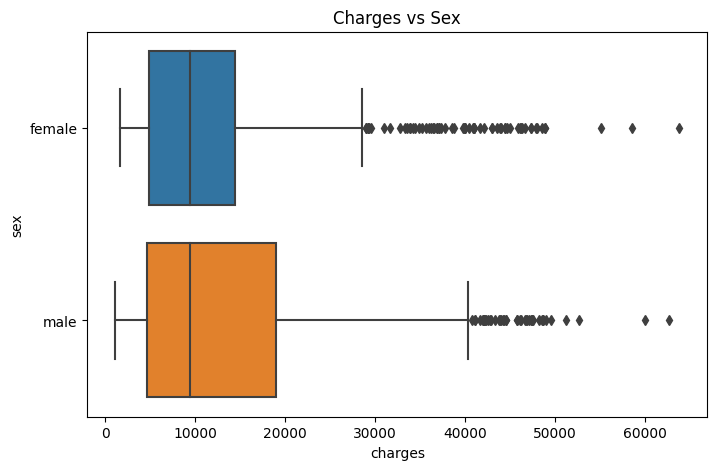

In [8]:
sns.boxplot(x='charges',y='sex',data=df)
plt.xlabel('charges')
plt.ylabel('sex')
plt.title('Charges vs Sex')

Text(0.5, 1.0, 'Charges vs Smoker')

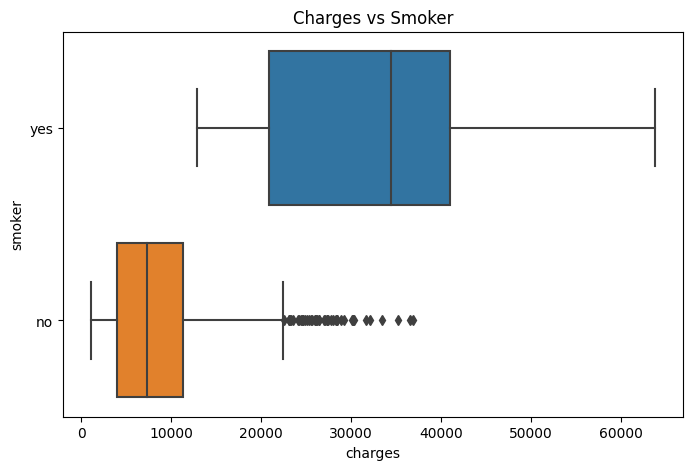

In [9]:
sns.boxplot(x='charges',y='smoker',data=df)
plt.xlabel('charges')
plt.ylabel('smoker')
plt.title('Charges vs Smoker')

Text(0.5, 1.0, 'BMI vs CHARGES')

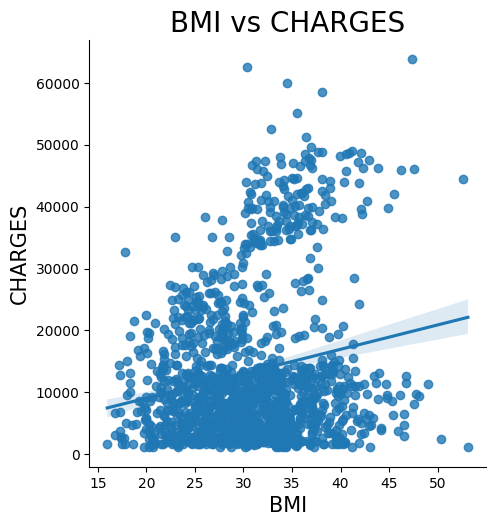

In [10]:
#correlation plot
sns.lmplot(x='bmi',y='charges',data=df)
plt.xlabel('BMI',fontsize=15)
plt.ylabel('CHARGES',fontsize=15)
plt.title('BMI vs CHARGES',fontsize=20)

<Axes: >

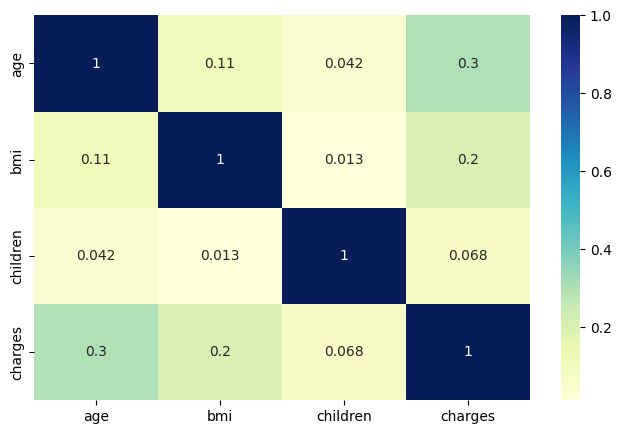

In [11]:
#correlation plot
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='YlGnBu',annot=True)

<Axes: xlabel='charges', ylabel='Count'>

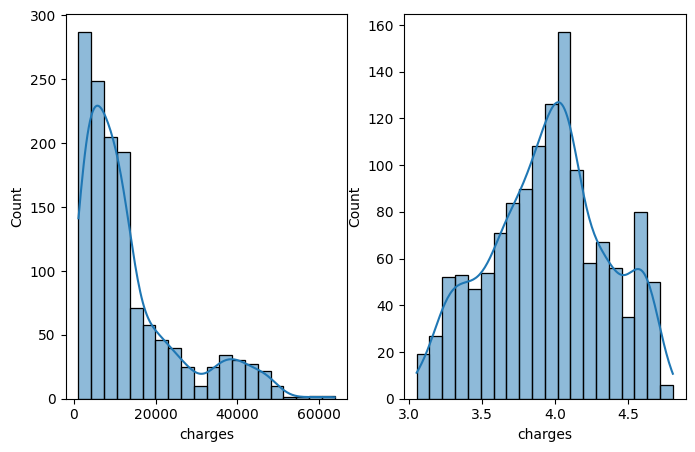

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
#target  varible
sns.histplot(df['charges'],kde=True,fill=True,bins=20,ax=ax1)
#data is right skewed

#To correct the skewness in the data, we perform log transformation
sns.histplot(np.log10(df['charges']),kde=True,fill=True,bins=20,ax=ax2)

In [13]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

Text(0.5, 1.0, 'Children vs Charges')

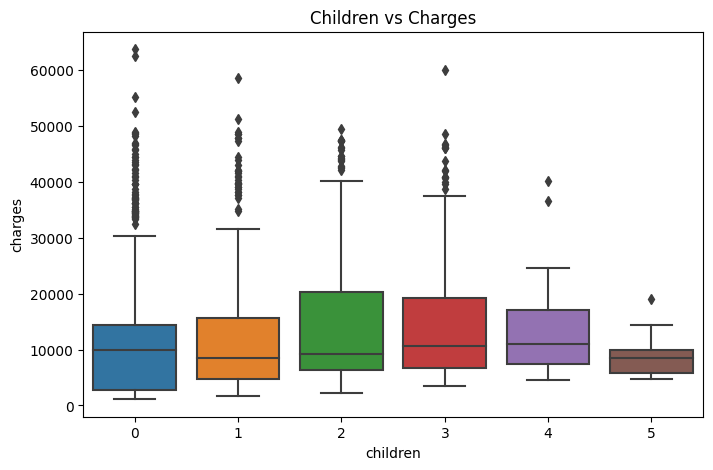

In [14]:
sns.boxplot(x='children',y='charges',data=df,)
plt.xlabel('children')
plt.ylabel('charges')
plt.title('Children vs Charges')

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Feature Engineering

In [16]:
categorical_columns = ['sex','children','smoker','region']
#one hot encoding
df_encoded=pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')

In [17]:
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


#### Data Transformation

In [18]:
df_encoded['charges'] = np.log10(df_encoded['charges'])

In [20]:
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3.648308,1,0,0,1,0,0,0,0,1,0
3,33,22.705,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3.587358,1,0,0,0,0,0,0,1,0,0


#### separating the dataset into features and label

In [21]:
x = df_encoded.drop(['charges'],axis=1) #input features
y = df_encoded['charges']#output variable

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [23]:
#splitting datasets into training sets and testing sets
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


### Linear regression and Xg boost

In [24]:
# Trainning the model using training dataset
lin_reg = LinearRegression()
xg = XGBRegressor(n_estimator=80,max_depth=4,learning_rate=0.1)
lin_reg.fit(X_train,y_train)
xg.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:56:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=80, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [25]:
lin_reg.coef_

array([ 0.01439002,  0.00587029, -0.02943099,  0.06490821,  0.11852708,
        0.10600906,  0.22728308,  0.20239429,  0.67336524, -0.02425312,
       -0.06365815, -0.05798184])

In [26]:
lin_reg.intercept_

3.0657592155426676

In [29]:
y_pred_lr= lin_reg.predict(X_test)
y_pred_xg = xg.predict(X_test)

In [30]:
print('mse in lr',mean_squared_error(y_pred_lr,y_test))
print('mse in xg',mean_squared_error(y_pred_xg,y_test))


mse in lr 0.03532625850724222
mse in xg 0.02530104910727576


In [32]:
print('score in lr',lin_reg.score(X_test,y_test))
print('score in xg',xg.score(X_test,y_test))

score in lr 0.7795687545055319
score in xg 0.8421247535769991


'''
This indicates that approximately 77.95% of the variance in the target variable can be explained by the linear regression model. '''

'''
This indicates that approximately 84.21% of the variance in the target variable can be explained by the Xg regression model. '''
'''